In [3]:
##import library yang dibutuhkan 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error


In [4]:
# baca file csv
df=pd.read_csv('/content/Salary_dataset.csv')


In [5]:
df

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [6]:
df=df.drop(['No'], axis=1)

In [7]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## **Mengetahui hubungan antara jumlah tahun bekerja dengan banyaknya salary menggunakan methode OLS stats model**

Ordinary Least Squares (OLS) adalah teknik umum untuk memperkirakan koefisien persamaan regresi linier yang menggambarkan hubungan antara satu atau lebih variabel kuantitatif independen dan variabel dependen.

In [10]:
# Asumsi Model
# Model 1: Hubungan linier antara YearsExperience dan Salary
# yaitu Salary = f(YearsExperience)= alfa + beta*YearsExperience
# Dibuat paling cocok menggunakan metode least sum of square
import statsmodels.formula.api as smf
model1=smf.ols(formula='Salary~YearsExperience',data=df).fit()

In [11]:
model1.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [12]:
model1.pvalues

Intercept          1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

In [13]:
model1.rsquared

0.9569566641435086

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        12:59:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Prediksi nilai penjualan berdasarkan persamaan 
salary_pred=model1.predict(pd.DataFrame(df['YearsExperience']))
salary_pred

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [16]:
# Hitung RMSE dan RSE untuk model 1 
df['salary_pred']=salary_pred

# RMSE
df['RSEd']=(df['Salary']-df['salary_pred'])**2
RSEd=df.sum()['RSEd']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
salary_pred_mean=np.mean(df['salary_pred'])
df['RSEp']=(salary_pred_mean-df['salary_pred'])**2
RSEp=df.sum()['RSEp']
RSE=RSEd/RSEp

salary_mean = np.mean(df['Salary'])
error=RMSE/salary_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(2165.7891767995657, 0.044979399244809, 0.028495726235455578)

In [17]:
# pakai fungsi rmse
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_val = rmse(df['Salary'], salary_pred)
rmse_val

5592.043608760659

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs Years of Experiencr using OLS')

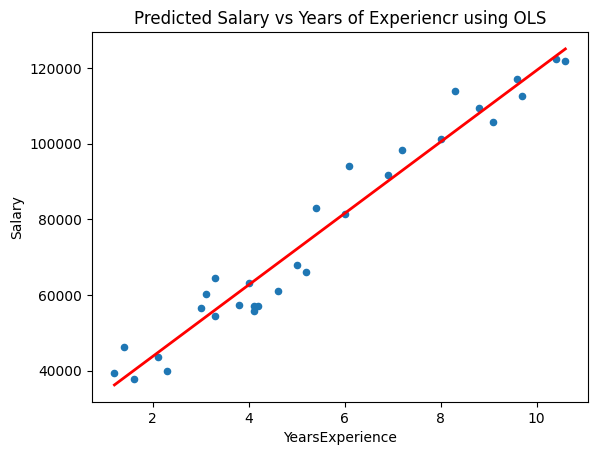

In [18]:
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred,c='red',linewidth=2)
plt.title('Predicted Salary vs Years of Experience using OLS')


## **Mengetahui hubungan antara jumlah tahun bekerja dengan banyaknya salary menggunakan methode Bayesian Regression model**


In [19]:

## Mendifinisikan x supaya menjadi 2 dimensi dan tidak skalar
X= df[['YearsExperience']]
Y= df['Salary']

In [20]:
from sklearn.model_selection import train_test_split

# buat data training dan testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)


In [21]:
regr_bayes = linear_model.BayesianRidge()

In [22]:
##Training
regr_bayes.fit(trainX, trainY)

BayesianRidge()

In [23]:
# buat prediksi dengan data testing
salary_y_pred = regr_bayes.predict(testX)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_bayes.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(testY, salary_y_pred, squared = False))

Coefficients: 
 [9690.22041245]
RMSE: 6765.85


In [24]:
print(salary_y_pred)

[ 73136.60120471  81857.79957591 115773.5710195  116742.59306074
  36313.76363739  80888.77753467  54725.18242105  89609.97590587
  54725.18242105]


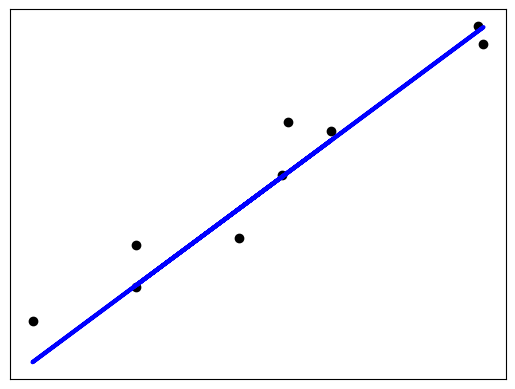

In [25]:
plt.scatter(testX,testY,  color='black')
plt.plot(testX, salary_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# **Mengetahui hubungan antara jumlah tahun bekerja dengan banyaknya salary menggunakan methode SVM**

In [26]:
from sklearn import svm
regr_svm = svm.LinearSVR()

In [36]:
# Train modeldengan training set
regr_svm.fit(trainX,trainY)

# buat prediksi dengan data testing
y_salary_pred = regr_svm.predict(testX)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_svm.coef_)
# RMSE
print('RMSE: %.2f'
      % mean_squared_error(testY, y_salary_pred, squared = False))

Coefficients: 
 [110.9]
RMSE: 83514.40


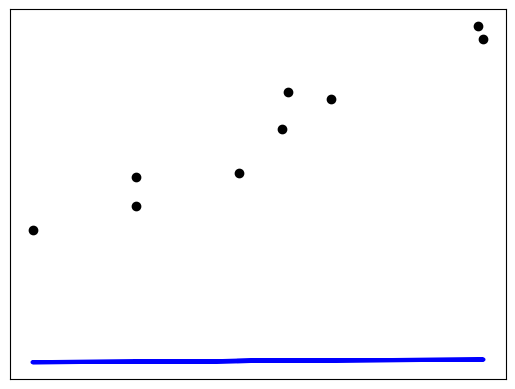

In [38]:
# Plot outputs
plt.scatter(testX,testY,  color='black')
plt.plot(X_gen_test, y_gen_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [29]:
 y_salary_pred

array([ 597.68,  697.49, 1085.64, 1096.73,  176.26,  686.4 ,  386.97,
        786.21,  386.97])

## **Berdasarkan tiga model di atas dapat diperole RMSE dari masing masing model adalah sebagai berikut:**

OLS = 5592.043608760659

Bayessian regression = 6765.85

SVM = 83514.40

Sehingga dapat disimpulkan model terbaik adalah OLS karena RMSE paling kecil
